In [1]:
import pandas as pd

# CSV dosyasını oku
df = pd.read_csv("lyrics.csv")

# İlk 5 satırı göster
df.head()


,Unnamed: 0,link,artist,song_name,lyrics
0,0,../lyrics/backstreetboys/climbingthewalls.html,Backstreet Boys Lyrics,Climbing The Walls,"\n\n[Brian:]\nClose your eyes, make a wish\nTh..."
1,1,../lyrics/westlife/howtobreakaheart.html,Westlife Lyrics,How To Break A Heart,\n\r\nSince you're not worth my love\nI haven'...
2,2,../lyrics/deanmartin/iwill.html,Dean Martin Lyrics,I Will,\n\r\nI don't want to be the one to say I'm go...
3,3,../lyrics/deanmartin/tellyourmotherhello.html,Dean Martin Lyrics,Tell Your Mother Hello,\n\r\nSure I loved the dear money that shines ...
4,4,../lyrics/deanmartin/behonestwithme.html,Dean Martin Lyrics,Be Honest With Me,\n\r\nBe honest with me dear whatever you do\n...


In [2]:
# Unnamed: 0 sütununu düşür
df = df.drop(columns=["Unnamed: 0", "link"])


In [3]:
# lyrics sütununda eksik olanları çıkar
df = df.dropna(subset=["lyrics"])


In [4]:
df.reset_index(drop=True, inplace=True)
df.head()


,artist,song_name,lyrics
0,Backstreet Boys Lyrics,Climbing The Walls,"\n\n[Brian:]\nClose your eyes, make a wish\nTh..."
1,Westlife Lyrics,How To Break A Heart,\n\r\nSince you're not worth my love\nI haven'...
2,Dean Martin Lyrics,I Will,\n\r\nI don't want to be the one to say I'm go...
3,Dean Martin Lyrics,Tell Your Mother Hello,\n\r\nSure I loved the dear money that shines ...
4,Dean Martin Lyrics,Be Honest With Me,\n\r\nBe honest with me dear whatever you do\n...


In [5]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: nltk in c:\users\acer\appdata\local\programs\python\python312\lib\site-packages (3.9.1)




[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Gerekli verileri indir (sadece bir kez yapılır)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(text):
    # Küçük harfe çevir
    text = text.lower()
    # Satır sonlarını ve özel karakterleri temizle
    text = re.sub(r"[\n\r]", " ", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Tokenize et
    tokens = word_tokenize(text)
    # Stopword'leri çıkar
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

# Örnek uygulama
sample = df["lyrics"][0]
print("Orijinal:", sample[:200])
print("Temizlenmiş:", preprocess(sample)[:20])


Orijinal: 

[Brian:]
Close your eyes, make a wish
That this could last forever
If only you could stay with me now
So tell me what it is
That keeps us from each other now
Yeah it's coming to get me
You're under 
Temizlenmiş: ['brian', 'close', 'eyes', 'make', 'wish', 'could', 'last', 'forever', 'could', 'stay', 'tell', 'keeps', 'yeah', 'coming', 'get', 'youre', 'skin', 'brian', 'cant', 'let']


In [8]:
# Lemmatization uygulayarak her kelimeyi kök haline getir
def lemmatized_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Stemming işlemi
def stemmed_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Tüm şarkı sözleri için: temizle, sonra lemmatize et
df["tokens"] = df["lyrics"].apply(preprocess)
df["lemmatized"] = df["tokens"].apply(lemmatized_tokens)
df["stemmed"] = df["tokens"].apply(stemmed_tokens)

# CSV olarak kaydet
df_lemmatized = df[["artist", "song_name", "lemmatized"]]
df_stemmed = df[["artist", "song_name", "stemmed"]]

df_lemmatized.to_csv("lemmatized_lyrics.csv", index=False)
df_stemmed.to_csv("stemmed_lyrics.csv", index=False)

print("Temiz dosyalar başarıyla kaydedildi ✅")


Temiz dosyalar başarıyla kaydedildi ✅


In [ ]:
df_lemmatized = df[["artist", "song_name", "lyrics", "lemmatized"]]
df_stemmed = df[["artist", "song_name", "lyrics", "stemmed"]]

df_lemmatized.to_csv("lemmatized_lyrics.csv", index=False)
df_stemmed.to_csv("stemmed_lyrics.csv", index=False)


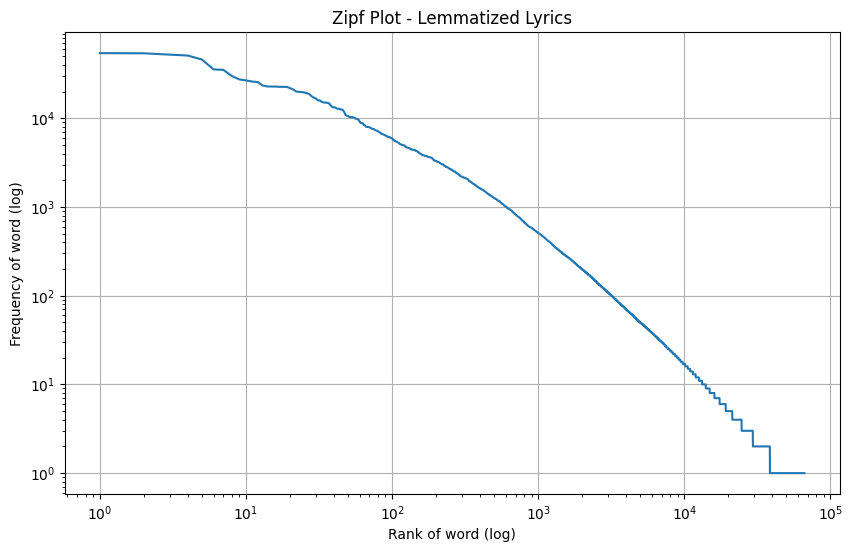

In [10]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Tüm lemmatized kelimeleri tek liste haline getir
all_words = [word for tokens in df["lemmatized"] for word in tokens]

# Kelime frekanslarını say
word_freq = Counter(all_words)

# En sık kullanılan kelimelere göre sırala
freqs = sorted(word_freq.values(), reverse=True)

# Zipf log-log grafiği
plt.figure(figsize=(10, 6))
plt.loglog(range(1, len(freqs)+1), freqs)
plt.title("Zipf Plot - Lemmatized Lyrics")
plt.xlabel("Rank of word (log)")
plt.ylabel("Frequency of word (log)")
plt.grid(True)
plt.show()


In [11]:
pip install scikit-learn



[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


In [13]:
# Lemmatized kelimeleri cümle haline getir
df["lemmatized_text"] = df["lemmatized"].apply(lambda x: " ".join(x))

# Stemmed kelimeleri cümle haline getir
df["stemmed_text"] = df["stemmed"].apply(lambda x: " ".join(x))


In [4]:
import pandas as pd

df = pd.read_csv("lemmatized_lyrics.csv")

# String -> Listeye çevir (çünkü CSV yazarken liste string'e dönüştü)
import ast
df["lemmatized"] = df["lemmatized"].apply(ast.literal_eval)

# Listeyi tekrar cümle haline getir
df["lemmatized_text"] = df["lemmatized"].apply(lambda x: " ".join(x))

# Kontrol edelim
print(df["lemmatized_text"].head(1).values[0])


brian close eye make wish could last forever could stay tell keep yeah coming get youre skin brian cant let youre part caught taste kiss dont wan know reason cant stay forever like climbing wall cause miss brian take hand take life dont take forever let feel pain kept inside yeah there got way together yeah coming get youre skin brian cant let youre part caught taste kiss ohh dont wan know reason cant stay forever like climbing wall cause miss howie illusion howie kevin feel way kevin cant howie illusion howie kevin nothing real way kevin cant brian nick cant let youre part caught taste kiss dont wan know dont wan know reason cant stay forever like climbing wall climbing wall cause miss nick brian ohhhh cant let dont wan know reason cant stay forever like ohh ohh climbing wall cause miss miss


In [5]:
import random
random.seed(42)

giris_index = random.randint(0, len(df) - 1)
giris_lyrics = df["lemmatized_text"][giris_index]
giris_sarki_adi = df["song_name"][giris_index]
giris_sanatci = df["artist"][giris_index]

print("🔹 Seçilen Şarkı:", giris_sarki_adi)
print("🔹 Sanatçı:", giris_sanatci)
print("🔹 Şarkı Sözleri (lemmatized):\n", giris_lyrics[:500])


🔹 Seçilen Şarkı: Do I Wanna Know?
🔹 Sanatçı: Hozier Lyrics
🔹 Şarkı Sözleri (lemmatized):
 got colour cheek ever get fear cant shift type stick around like something teeth ace sleeve idea youre deep dreamt nearly every night week many secret keep cause there tune found make think somehow play repeat fall asleep spilling drink settee wan know feeling flow way sad see sort hoping youd stay baby know night mainly made saying thing cant say tomorrow day crawling back ever thought calling youve cause always maybe busy fall somebody new ive thought crawling back got gut wondering heart stil


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [7]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["lemmatized_text"])


In [8]:
giris_tfidf = tfidf_matrix[giris_index]


In [9]:
benzerlikler = cosine_similarity(giris_tfidf, tfidf_matrix).flatten()


In [10]:
benzer_sarkilar_index = benzerlikler.argsort()[::-1][1:6]

for i in benzer_sarkilar_index:
    print("🎵", df["song_name"][i], "| 👤", df["artist"][i])
    print("🔗 Benzerlik Skoru:", round(benzerlikler[i], 3))
    print("---")


🎵 Do I Wanna Know? | 👤 Arctic Monkeys Lyrics
🔗 Benzerlik Skoru: 0.994
---
🎵 Crawling Back To You | 👤 Backstreet Boys Lyrics
🔗 Benzerlik Skoru: 0.367
---
🎵 My Cure | 👤 Taylor Swift Lyrics
🔗 Benzerlik Skoru: 0.273
---
🎵 I Don't Wanna Be Sad | 👤 Simple Plan Lyrics
🔗 Benzerlik Skoru: 0.242
---
🎵 I Just Thought You'd Like To Know | 👤 Johnny Cash Lyrics
🔗 Benzerlik Skoru: 0.239
---


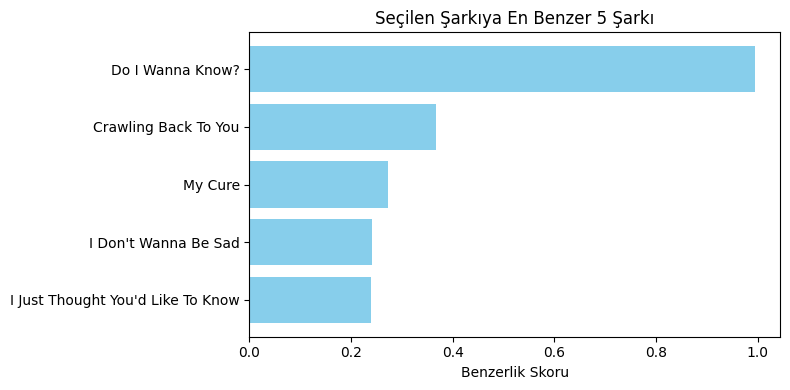

In [11]:
import matplotlib.pyplot as plt

# Şarkı adları
sarkilar = [df["song_name"][i] for i in benzer_sarkilar_index]
# Skorlar
skorlar = [round(benzerlikler[i], 3) for i in benzer_sarkilar_index]

plt.figure(figsize=(8, 4))
plt.barh(sarkilar, skorlar, color='skyblue')
plt.xlabel("Benzerlik Skoru")
plt.title("Seçilen Şarkıya En Benzer 5 Şarkı")
plt.gca().invert_yaxis()  # En benzer yukarıda görünsün
plt.tight_layout()
plt.show()


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [13]:
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(df["lemmatized_text"])


In [14]:
giris_bow = bow_matrix[giris_index]


In [15]:
benzerlikler_bow = cosine_similarity(giris_bow, bow_matrix).flatten()


In [16]:
benzer_sarkilar_index_bow = benzerlikler_bow.argsort()[::-1][1:6]

for i in benzer_sarkilar_index_bow:
    print("🎵", df["song_name"][i], "| 👤", df["artist"][i])
    print("🔗 Benzerlik Skoru:", round(benzerlikler_bow[i], 3))
    print("---")


🎵 Do I Wanna Know? | 👤 Arctic Monkeys Lyrics
🔗 Benzerlik Skoru: 0.998
---
🎵 Back To You | 👤 Selena Gomez Lyrics
🔗 Benzerlik Skoru: 0.476
---
🎵 San Francisco | 👤 5 Seconds Of Summer Lyrics
🔗 Benzerlik Skoru: 0.464
---
🎵 Postcards | 👤 James Blunt Lyrics
🔗 Benzerlik Skoru: 0.462
---
🎵 Fireworks | 👤 Plain White T's Lyrics
🔗 Benzerlik Skoru: 0.457
---


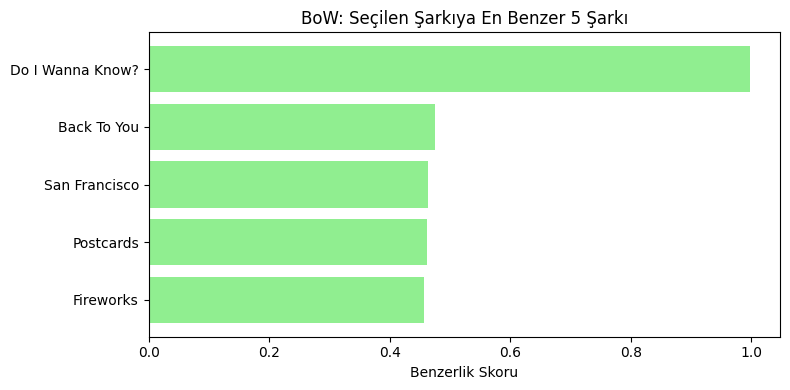

In [17]:
import matplotlib.pyplot as plt

# Şarkı adları
sarkilar_bow = [df["song_name"][i] for i in benzer_sarkilar_index_bow]

# Skorlar
skorlar_bow = [round(benzerlikler_bow[i], 3) for i in benzer_sarkilar_index_bow]

plt.figure(figsize=(8, 4))
plt.barh(sarkilar_bow, skorlar_bow, color='lightgreen')
plt.xlabel("Benzerlik Skoru")
plt.title("BoW: Seçilen Şarkıya En Benzer 5 Şarkı")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [19]:
!pip install gensim


     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 660.6 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 540.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.0 MB 3.3 MB/s eta 0:00:08
   ---------------------------------------- 0.2/24.0 MB 2.1 MB/s eta 0:00:12
    --------------------------------------- 0.4/24.0 MB 2.8 MB/s eta 0:00:09
   - -------------------------------------- 0.7/24.0 MB 3.7 MB/s eta 0:00:07
   - -------------------------------------- 1.0/24.0 MB 4.1 MB/s eta 0:00:06
   -- ------------------------------------- 1.6/24.0 MB 5.7 MB/s eta 0:00:04
   -

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!pip install numpy==1.23.5


     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     --------------------------------------- 0.0/10.7 MB 495.5 kB/s eta 0:00:22
     --------------------------------------- 0.1/10.7 MB 880.9 kB/s eta 0:00:13
      --------------------------------------- 0.2/10.7 MB 1.2 MB/s eta 0:00:09
      --------------------------------------- 0.2/10.7 MB 1.1 MB/s eta 0:00:10
     - -------------------------------------- 0.5/10.7 MB 1.8 MB/s eta 0:00:06
     - -------------------------------------- 0.5/10.7 MB 1.7 MB/s eta 0:00:07
     --- ------------------------------------ 1.0/10.7 MB 3.0 MB/s eta 0:00:04
     ----- ---------------------------------- 1.5/10.7 MB 3.9 MB/s eta 0:00:03
     ------- -------------------------------- 2.1/10.7 MB 4.9 MB/s eta 0:00:02
     ----------- ---------------------------- 3.2/10.7 MB 6.6 MB/s eta 0:00:02
     ---------------- ----------------------- 4.4/10.7 MB 8.0 MB

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Traceback (most recent call last):
    File "C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
      backend = _build_backend()
                ^^^^^^^^^^^^^^^^
    File "C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_proce

In [2]:
!pip install pandas numpy gensim scikit-learn


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.6 MB 4.5 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.6 MB 5.6 MB/s eta 0:00:02
   ------------- -------------------------- 3.9/11.6 MB 5.6 MB/s eta 0:00:02
   ---------------- ----------------------- 4.7/11.6 MB 5.6 MB/s eta 0:00:02
   -------------------- ------------------- 6.0/11.6 MB 5.5 MB/s eta 0:00:02
   -------------------------- ------------- 7.6/11.6 MB 5.7 MB/s eta 0:00:01
   ------------------------------ --------- 8.9/11.6 MB 5.8 MB/s eta 0:00:01
   ------------------------------------ --- 10.5/11.6 MB 6.0 MB/s eta 0:00:01
   ----------------------------------------

In [3]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity


In [4]:
df = pd.read_csv("lemmatized_lyrics.csv")
df.head()


,artist,song_name,lyrics,lemmatized
0,Backstreet Boys Lyrics,Climbing The Walls,"\n\n[Brian:]\nClose your eyes, make a wish\nTh...","['brian', 'close', 'eye', 'make', 'wish', 'cou..."
1,Westlife Lyrics,How To Break A Heart,\n\r\nSince you're not worth my love\nI haven'...,"['since', 'youre', 'worth', 'love', 'havent', ..."
2,Dean Martin Lyrics,I Will,\n\r\nI don't want to be the one to say I'm go...,"['dont', 'want', 'one', 'say', 'gon', 'miss', ..."
3,Dean Martin Lyrics,Tell Your Mother Hello,\n\r\nSure I loved the dear money that shines ...,"['sure', 'loved', 'dear', 'money', 'shine', 'h..."
4,Dean Martin Lyrics,Be Honest With Me,\n\r\nBe honest with me dear whatever you do\n...,"['honest', 'dear', 'whatever', 'remember', 'yo..."


In [5]:
import ast

df['tokens'] = df['lemmatized'].apply(ast.literal_eval)
df['tokens'].head()


0    [brian, close, eye, make, wish, could, last, f...
1    [since, youre, worth, love, havent, given, str...
2    [dont, want, one, say, gon, miss, dont, want, ...
3    [sure, loved, dear, money, shine, hair, brow, ...
4    [honest, dear, whatever, remember, youre, mine...
Name: tokens, dtype: object

In [6]:
from gensim.models import Word2Vec

# Modeli eğit
model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Modeli kaydet (isteğe bağlı)
# model.save("word2vec_lemmatized.model")

# Eğitim tamamlandı mesajı
print("✅ Word2Vec modeli eğitildi.")


✅ Word2Vec modeli eğitildi.


In [7]:
model.wv.most_similar('love', topn=10)


[('baby', 0.6362289190292358),
 ('true', 0.6239109039306641),
 ('shane', 0.6033043265342712),
 ('fall', 0.603276252746582),
 ('cause', 0.5861644744873047),
 ('know', 0.5770933032035828),
 ('darling', 0.5646156072616577),
 ('trust', 0.5638443231582642),
 ('want', 0.5620439648628235),
 ('forever', 0.5616388320922852)]

In [8]:
model.wv.most_similar('heart')
model.wv.most_similar('miss')
model.wv.most_similar('happy')  # varsa


[('unhappy', 0.676916778087616),
 ('sad', 0.6275951862335205),
 ('glad', 0.5986669659614563),
 ('sunshine', 0.5452138781547546),
 ('belated', 0.5429656505584717),
 ('ending', 0.5342693328857422),
 ('sing', 0.5294128656387329),
 ('cincinatti', 0.5168901681900024),
 ('whoahhh', 0.502432107925415),
 ('rockapotomus', 0.49888283014297485)]

In [9]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Her şarkının vektörünü hesapla
def get_song_vector(tokens):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Şarkı vektörlerini hesapla
df['vector'] = df['tokens'].apply(get_song_vector)

# Rastgele bir şarkı seç (vektörü boş olmayan)
sample_index = df[df['vector'].apply(lambda x: np.any(x))].sample(1).index[0]
sample_vector = df.loc[sample_index, 'vector']

# Tüm şarkılarla benzerlikleri hesapla
similarities = cosine_similarity([sample_vector], df['vector'].tolist())[0]

# En benzer 5 şarkıyı al
top_indices = similarities.argsort()[-6:][::-1]  # en benzer 6 (ilki kendisi olur)
top_indices = [i for i in top_indices if i != sample_index][:5]  # kendisini çıkar

# Sonuçları göster
print(f"\n🎵 Rastgele seçilen şarkı: {df.loc[sample_index, 'song_name']} ({df.loc[sample_index, 'artist']})")
print("\n📌 Önerilen benzer şarkılar:")
for i in top_indices:
    print(f"- {df.loc[i, 'song_name']} ({df.loc[i, 'artist']})")



🎵 Rastgele seçilen şarkı: Deconstruction (Prince Lyrics)

📌 Önerilen benzer şarkılar:
- Candle In The Wind 1997 (Elton John Lyrics)
- Where Is The Love (Celine Dion Lyrics)
- Curtains (Elton John Lyrics)
- The Day That Love Began (Stevie Wonder Lyrics)
- Digital Garden (Prince Lyrics)


In [11]:
!pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 3.4 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 6.9 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.1 MB 8.1 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 8.1 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------- ------- 1.8/2.2 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 7.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------------------------------- ---- 2.4/2.7 MB 12.2 MB/s et

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# 🔠 Tüm kelimeleri birleştir
all_tokens = [token for tokens in df['tokens'] for token in tokens]

# 📊 Frekansları hesapla
word_counts = Counter(all_tokens)

# 🔝 En sık geçen kelimeleri sırala
most_common = word_counts.most_common()

# 🏷️ Sıralama (rank) ve frekans listeleri
ranks = np.arange(1, len(most_common) + 1)
frequencies = np.array([freq for word, freq in most_common])


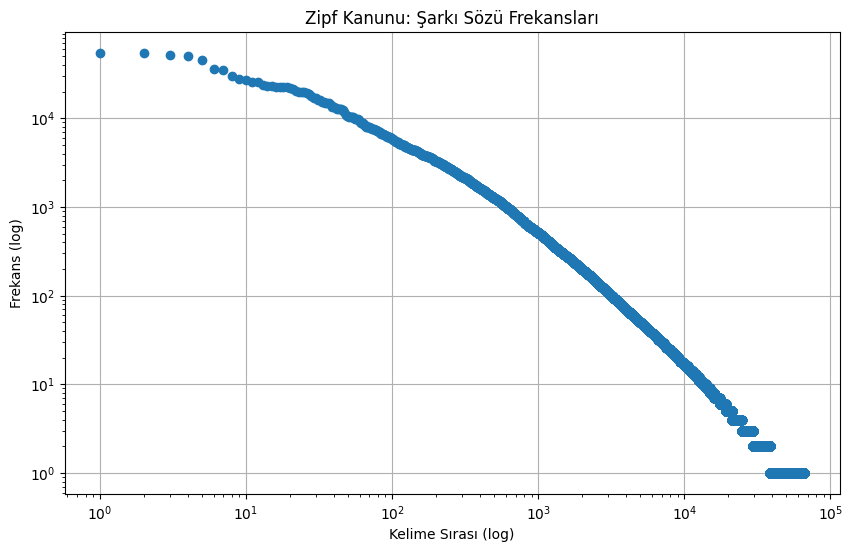

In [13]:
# 📊 Zipf Kanunu grafiğini çiz
plt.figure(figsize=(10, 6))
plt.plot(ranks, frequencies, marker='o', linestyle='none')
plt.xscale('log')
plt.yscale('log')
plt.title("Zipf Kanunu: Şarkı Sözü Frekansları")
plt.xlabel("Kelime Sırası (log)")
plt.ylabel("Frekans (log)")
plt.grid(True)
plt.show()


In [14]:
import pandas as pd
import ast

# Stemmed CSV dosyasını oku
df2 = pd.read_csv("stemmed_lyrics.csv")

# 'stemmed' sütunundaki string listeyi gerçek Python listesine çevir
df2['tokens'] = df2['stemmed'].apply(ast.literal_eval)

# İlk 5 satırı görüntüle
df2.head()


,artist,song_name,lyrics,stemmed,tokens
0,Backstreet Boys Lyrics,Climbing The Walls,"\n\n[Brian:]\nClose your eyes, make a wish\nTh...","['brian', 'close', 'eye', 'make', 'wish', 'cou...","[brian, close, eye, make, wish, could, last, f..."
1,Westlife Lyrics,How To Break A Heart,\n\r\nSince you're not worth my love\nI haven'...,"['sinc', 'your', 'worth', 'love', 'havent', 'g...","[sinc, your, worth, love, havent, given, stron..."
2,Dean Martin Lyrics,I Will,\n\r\nI don't want to be the one to say I'm go...,"['dont', 'want', 'one', 'say', 'gon', 'miss', ...","[dont, want, one, say, gon, miss, dont, want, ..."
3,Dean Martin Lyrics,Tell Your Mother Hello,\n\r\nSure I loved the dear money that shines ...,"['sure', 'love', 'dear', 'money', 'shine', 'ha...","[sure, love, dear, money, shine, hair, brow, t..."
4,Dean Martin Lyrics,Be Honest With Me,\n\r\nBe honest with me dear whatever you do\n...,"['honest', 'dear', 'whatev', 'rememb', 'your',...","[honest, dear, whatev, rememb, your, mine, dea..."


In [15]:
from gensim.models import Word2Vec

# Stemmed veriye göre Word2Vec modelini eğit
model2 = Word2Vec(sentences=df2['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# (İsteğe bağlı) modeli kaydetmek istersen:
# model2.save("word2vec_stemmed.model")

print("✅ Stemmed Word2Vec modeli eğitildi.")


✅ Stemmed Word2Vec modeli eğitildi.


In [16]:
print("❤️ love:")
print(model2.wv.most_similar('love', topn=10))

print("\n💔 heart:")
print(model2.wv.most_similar('heart', topn=10))

print("\n🙂 happy:")
print(model2.wv.most_similar('happy', topn=10))  # varsa


❤️ love:
[('babi', 0.6470207571983337), ('true', 0.6317695379257202), ('caus', 0.6309068202972412), ('fall', 0.5895437002182007), ('need', 0.5798529982566833), ('want', 0.5789133906364441), ('shane', 0.5765334963798523), ('know', 0.5739197134971619), ('nyla', 0.5569384098052979), ('say', 0.5564377307891846)]

💔 heart:
[('apart', 0.5736972093582153), ('mend', 0.5683711171150208), ('broken', 0.5556606650352478), ('soul', 0.5456828474998474), ('love', 0.5267170667648315), ('bleed', 0.5265718698501587), ('scar', 0.5127792358398438), ('instrument', 0.5081760883331299), ('ach', 0.4949817955493927), ('heal', 0.4921856224536896)]

🙂 happy:
[('laim', 0.7828969359397888), ('sapplait', 0.7814987897872925), ('revoltin', 0.7759442925453186), ('ipullupatthegarageinthecar', 0.7748871445655823), ('reveeeennnng', 0.774468719959259), ('semoc', 0.7742263674736023), ('sifflement', 0.771666407585144), ('grrah', 0.7716442346572876), ('boucher', 0.7716289758682251), ('clamamu', 0.7716002464294434)]


In [17]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Stemmed şarkı vektörünü hesaplayan fonksiyon
def get_song_vector(tokens):
    vectors = [model2.wv[word] for word in tokens if word in model2.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model2.vector_size)

# Vektör sütununu oluştur
df2['vector'] = df2['tokens'].apply(get_song_vector)

# Rastgele bir şarkı seç (vektörü olanlardan)
sample_index = df2[df2['vector'].apply(lambda x: np.any(x))].sample(1).index[0]
sample_vector = df2.loc[sample_index, 'vector']

# Tüm şarkılarla benzerlikleri hesapla
similarities = cosine_similarity([sample_vector], df2['vector'].tolist())[0]

# İlk 5 benzer şarkıyı al (kendisi hariç)
top_indices = [i for i in similarities.argsort()[::-1] if i != sample_index][:5]

# Sonuçları yazdır
print(f"🎵 Rastgele seçilen şarkı: {df2.loc[sample_index, 'song_name']} ({df2.loc[sample_index, 'artist']})\n")
print("🌟 Önerilen benzer şarkılar:")
for i in top_indices:
    print(f"- {df2.loc[i, 'song_name']} ({df2.loc[i, 'artist']})")


🎵 Rastgele seçilen şarkı: Last Chance Train (Bon Jovi Lyrics)

🌟 Önerilen benzer şarkılar:
- Leaving On A Jet Plane (Frank Sinatra Lyrics)
- Come To Your Window (Cher Lyrics)
- Brokenpromiseland (Bon Jovi Lyrics)
- London Bridge (Ed Sheeran Lyrics)
- Outer Space / Carry On (5 Seconds Of Summer Lyrics)
